In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('stemmed_reviews.csv')
df.head()

,Review_Text,Rating,Sentiment,stemmed_review
0,I have mixed feelings about my experience.,4,2,mix feel experi
1,The staff was caring and attentive. I couldn't...,5,2,staff care attent happier
2,I have mixed feelings about my experience.,5,2,mix feel experi
3,I have mixed feelings about my experience.,5,2,mix feel experi
4,The healthcare provider was excellent. I had a...,3,1,healthcar provid excel great experi


#### Pie chart shows Sentiment frequency

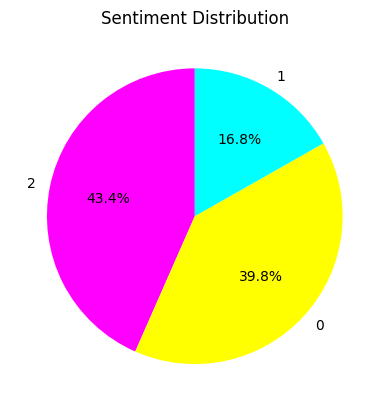

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Read the DataFrame from the CSV file
df = pd.read_csv('stemmed_reviews.csv')

# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Create a pie chart for sentiment distribution
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['magenta', 'yellow', 'aqua'])
plt.title('Sentiment Distribution')
plt.show()


#### Bar chart gives max use of text in reviews

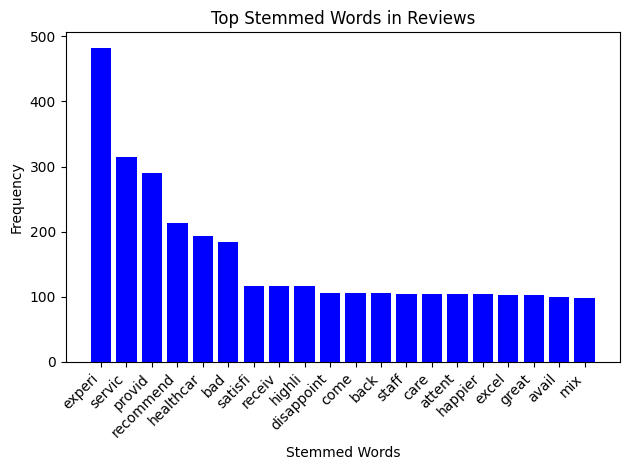

In [6]:
# Count the occurrences of each stemmed word in the 'stemmed_review' column
stemmed_word_counts = Counter(' '.join(df['stemmed_review']).split())

# Get the most common words and their frequencies
top_stemmed_words = stemmed_word_counts.most_common(20)

# Extract words and frequencies for plotting
stemmed_words, stemmed_frequencies = zip(*top_stemmed_words)

# Create a bar chart for the top stemmed words
plt.bar(stemmed_words, stemmed_frequencies, color='blue')
plt.xlabel('Stemmed Words')
plt.ylabel('Frequency')
plt.title('Top Stemmed Words in Reviews')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

#### Scatter plot for Sentiment vs Rating

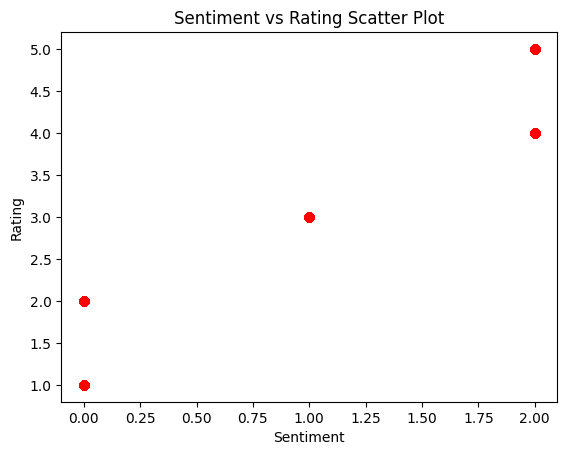

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Scatter plot for Sentiment vs Rating without creating a new DataFrame

plt.scatter(df['Sentiment'], df['Rating'],color ='Red')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.title('Sentiment vs Rating Scatter Plot')
plt.show()

#### Word Cloud for Stemmed Reviews text 

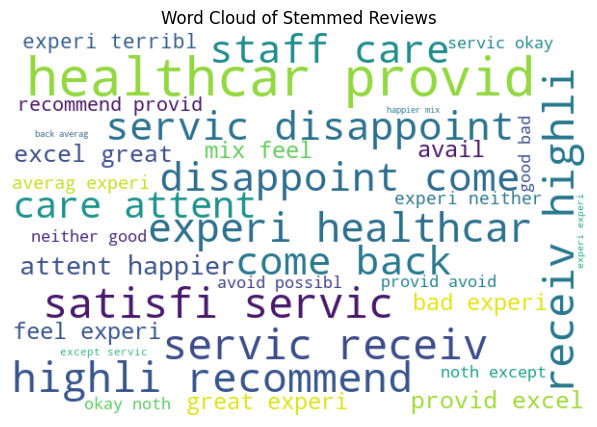

In [8]:
from wordcloud import WordCloud

# Concatenate all text from the 'stemmed_review' column
text = ' '.join(df['stemmed_review'])

# Generate the word cloud
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Stemmed Reviews')
plt.show()

#### N-grams frequency chart for stemmed review text 

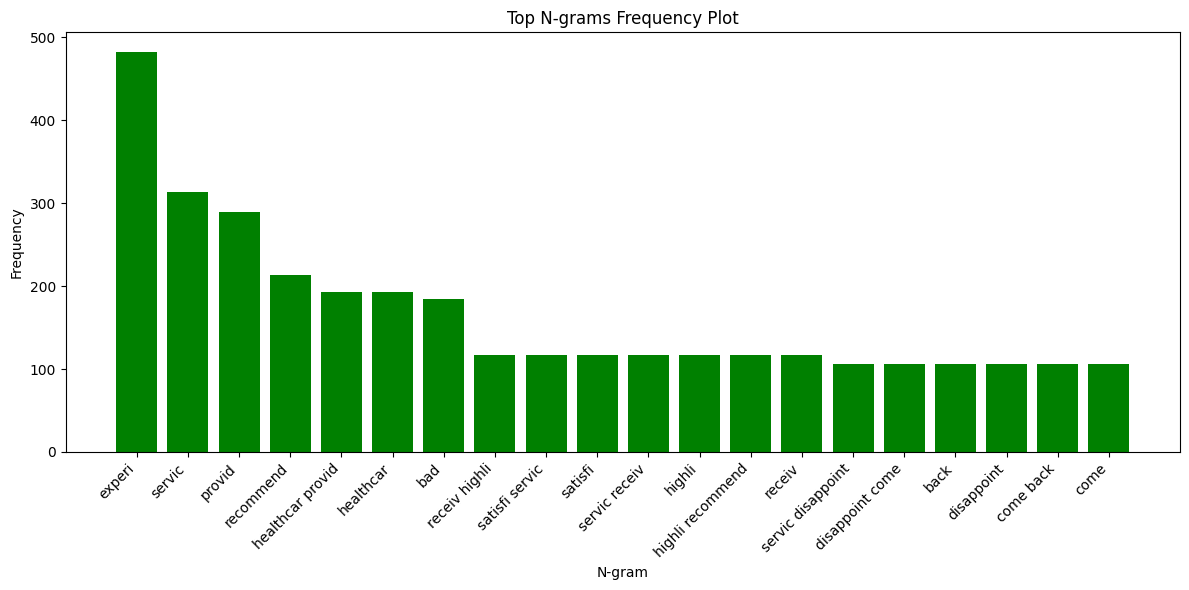

In [9]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer to extract N-grams
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2)) 

# Fit and transform the 'stemmed_review' column
ngrams = ngram_vectorizer.fit_transform(df['stemmed_review'])

# Get feature names (N-grams)
feature_names = ngram_vectorizer.get_feature_names_out()

# Sum the occurrences of each N-gram
ngram_counts = ngrams.sum(axis=0)

# Create a DataFrame for N-gram frequencies
ngram_df = pd.DataFrame({'N-gram': feature_names, 'Frequency': ngram_counts.flat})

# Sort the DataFrame by frequency in descending order
ngram_df = ngram_df.sort_values(by='Frequency', ascending=False)

# Plot the top N-grams
top_ngrams = ngram_df.head(20)  # Adjust the number as needed
plt.figure(figsize=(12, 6))
plt.bar(top_ngrams['N-gram'], top_ngrams['Frequency'], color='green')
plt.xlabel('N-gram')
plt.ylabel('Frequency')
plt.title('Top N-grams Frequency Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Histogram for Sentiment frequency

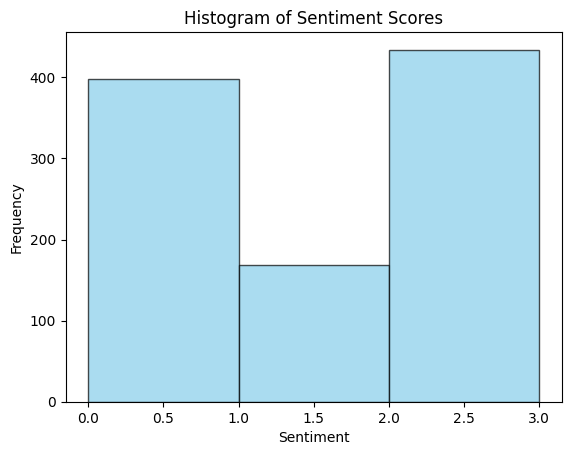

In [10]:
# Histogram for the 'Sentiment' column

# plt.hist(df['Sentiment'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.hist(df['Sentiment'], bins=[0, 1, 2, 3], color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores')
plt.show()


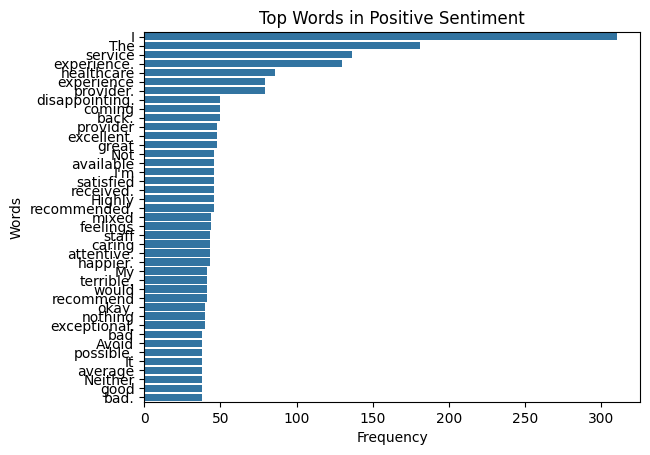

In [11]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter

# Define stopwords
stops = set(stopwords.words('english'))

# Simplified counter function
def create_corpus(sentiment_value):
    corpus = []
    
    for x in df[df['Sentiment'] == sentiment_value]['Review_Text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus_positive = create_corpus(2)  # Use the numeric value for positive sentiment
counter_positive = Counter(corpus_positive)
most_positive = counter_positive.most_common()

x_pos = []
y_pos = []
for word, count in most_positive[:100]:
    if word not in stops:
        x_pos.append(word)
        y_pos.append(count)

sns.barplot(x=y_pos, y=x_pos)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top Words in Positive Sentiment')
plt.show()


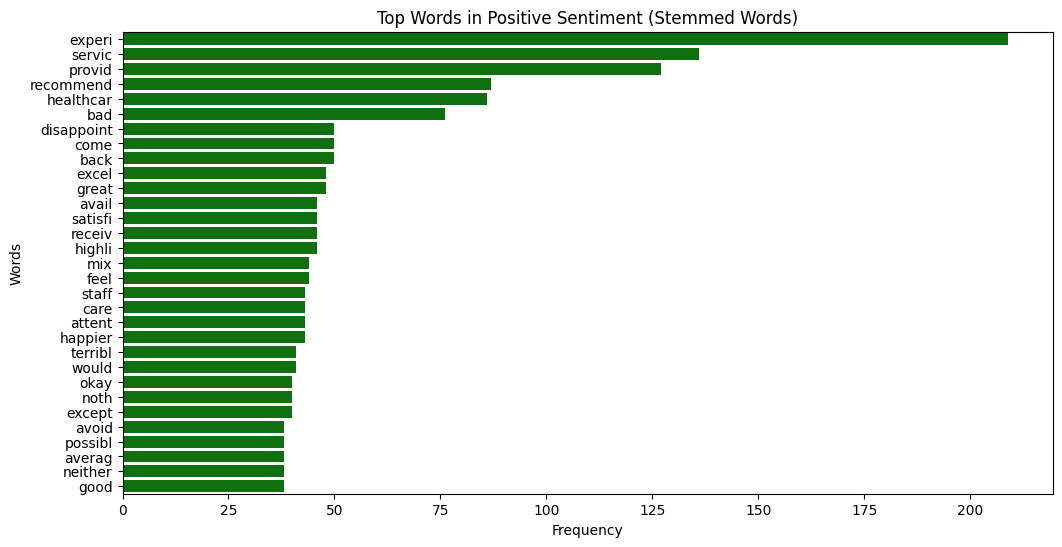

In [13]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter

# Define stopwords
stops = set(stopwords.words('english'))

# Simplified counter function
def create_corpus(sentiment_value, column_name):
    corpus = []
    
    for x in df[df['Sentiment'] == sentiment_value][column_name].str.split():
        for i in x:
            corpus.append(i)
    return corpus

# Create corpus for stemmed words
corpus_stemmed = create_corpus(2, 'stemmed_review')  # Use the numeric value for positive sentiment

# Count occurrences for stemmed words
counter_stemmed = Counter(corpus_stemmed)
most_stemmed = counter_stemmed.most_common()

# Plot for stemmed words
x_stemmed = []
y_stemmed = []
for word, count in most_stemmed[:100]:
    if word not in stops:
        x_stemmed.append(word)
        y_stemmed.append(count)

plt.figure(figsize=(12, 6))
sns.barplot(x=y_stemmed, y=x_stemmed, color='green')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top Words in Positive Sentiment (Stemmed Words)')
plt.show()
